# Customer Segmentation

# 1.Import Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder,StandardScaler,MinMaxScaler
from sklearn.cluster import KMeans,MeanShift, DBSCAN, estimate_bandwidth
from sklearn.mixture import GaussianMixture
from  sklearn.decomposition import PCA
from sklearn.metrics import calinski_harabasz_score,davies_bouldin_score,silhouette_score

# 2.Loading and Cleaning the Dataset

In [61]:
df = pd.read_excel('data.xlsx')
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [63]:
print("We have {} rows and {} columns in the dataset ".format(df.shape[0],df.shape[1]))

We have 541909 rows and 8 columns in the dataset 


In [64]:
print(f'The Columns names are :\n{df.columns}')

The Columns names are :
Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')


In [65]:
df.dtypes

InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID            float64
Country                object
dtype: object

In [66]:
df['Country'].nunique()

38

In [67]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [26]:
df.dropna(inplace = True)   

In [27]:
print("We have {} rows and {} columns in the dataset ".format(df.shape[0],df.shape[1]))

We have 406829 rows and 8 columns in the dataset 


In [28]:
df.reset_index(inplace = True,drop = True)

In [29]:
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
406824,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
406825,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
406826,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
406827,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


In [68]:
initial_df = df.copy()

In [69]:
initial_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


# 3.Encoding Categorical Features 

In [70]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [71]:
le = LabelEncoder()

categories = ['InvoiceNo','StockCode','Description','InvoiceDate','CustomerID','Country']

for category in categories:
    initial_df[category] = le.fit_transform(initial_df[category].astype(str))
initial_df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,0,3536,3918,6,0,2.55,4048,36
1,0,2794,3926,6,0,3.39,4048,36
2,0,3044,913,8,0,2.75,4048,36
3,0,2985,1910,6,0,3.39,4048,36
4,0,2984,2911,6,0,3.39,4048,36
...,...,...,...,...,...,...,...,...
541904,22060,1527,2379,12,23259,0.85,275,13
541905,22060,1803,743,6,23259,2.10,275,13
541906,22060,2145,749,4,23259,4.15,275,13
541907,22060,2146,748,4,23259,4.15,275,13


In [72]:
initial_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  int64  
 1   StockCode    541909 non-null  int64  
 2   Description  541909 non-null  int64  
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  int64  
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   541909 non-null  int64  
 7   Country      541909 non-null  int64  
dtypes: float64(1), int64(7)
memory usage: 33.1 MB


In [73]:
initial_df.describe()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
count,541909.000000,541909.000000,541909.000000,541909.000000,541909.000000,541909.000000,541909.000000,541909.000000
mean,11648.523427,1650.693107,2136.101783,9.552250,12164.309502,4.611114,2723.673310,34.259772
std,6730.300232,932.806239,1148.780307,218.081158,6971.111557,96.759853,1444.151052,6.222861
min,0.000000,0.000000,0.000000,-80995.000000,0.000000,-11062.060000,0.000000,0.000000
25%,5553.000000,966.000000,1209.000000,1.000000,5895.000000,1.250000,1495.000000,36.000000
50%,11967.000000,1563.000000,2101.000000,3.000000,12565.000000,2.080000,2890.000000,36.000000
75%,17484.000000,2174.000000,3129.000000,10.000000,18344.000000,4.130000,4370.000000,36.000000
max,25899.000000,4069.000000,4223.000000,80995.000000,23259.000000,38970.000000,4372.000000,37.000000


# 4.Data Cleaning and Preprocessing


In [74]:
df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

In [75]:
# initial_df.drop(axis=1,columns='InvoiceNo',inplace=True)
wrong_data = initial_df[initial_df['Quantity']<0].index
wrong_data

Index([   141,    154,    235,    236,    237,    238,    239,    240,    241,
          939,
       ...
       540141, 540142, 540176, 540422, 540448, 540449, 541541, 541715, 541716,
       541717],
      dtype='int64', length=10624)

In [76]:
initial_df.drop(index=wrong_data,axis=0,inplace=True)
initial_df.reset_index(drop=True,inplace=True)
initial_df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,0,3536,3918,6,0,2.55,4048,36
1,0,2794,3926,6,0,3.39,4048,36
2,0,3044,913,8,0,2.75,4048,36
3,0,2985,1910,6,0,3.39,4048,36
4,0,2984,2911,6,0,3.39,4048,36
...,...,...,...,...,...,...,...,...
531280,22060,1527,2379,12,23259,0.85,275,13
531281,22060,1803,743,6,23259,2.10,275,13
531282,22060,2145,749,4,23259,4.15,275,13
531283,22060,2146,748,4,23259,4.15,275,13


In [77]:
initial_df.describe()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
count,531285.000000,531285.000000,531285.00000,531285.000000,531285.000000,531285.000000,531285.000000,531285.000000
mean,11435.363901,1646.793864,2131.98190,10.655262,12177.192985,3.857296,2731.153381,34.280226
std,6584.282088,930.136142,1146.21796,156.830323,6975.828481,41.810047,1443.058056,6.187781
min,0.000000,0.000000,0.00000,1.000000,0.000000,-11062.060000,0.000000,0.000000
25%,5436.000000,966.000000,1209.00000,1.000000,5901.000000,1.250000,1508.000000,36.000000
50%,11790.000000,1559.000000,2092.00000,3.000000,12593.000000,2.080000,2905.000000,36.000000
75%,17231.000000,2174.000000,3127.00000,10.000000,18361.000000,4.130000,4372.000000,36.000000
max,22063.000000,4069.000000,4221.00000,80995.000000,23259.000000,13541.330000,4372.000000,37.000000


# 5.Normalizing the Data and Descriptive Statistics

In [78]:
scaler=MinMaxScaler(feature_range=(1,5))
normalized_array=scaler.fit_transform(initial_df)
normalized_df=pd.DataFrame(normalized_array,columns=initial_df.columns)
normalized_df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,1.000000,4.476038,4.712864,1.000247,1.0,2.798876,4.703568,4.891892
1,1.000000,3.746621,4.720445,1.000247,1.0,2.799012,4.703568,4.891892
2,1.000000,3.992381,1.865198,1.000346,1.0,2.798908,4.703568,4.891892
3,1.000000,3.934382,2.809998,1.000247,1.0,2.799012,4.703568,4.891892
4,1.000000,3.933399,3.758588,1.000247,1.0,2.799012,4.703568,4.891892
...,...,...,...,...,...,...,...,...
531280,4.999456,2.501106,3.254442,1.000543,5.0,2.798599,1.251601,2.405405
531281,4.999456,2.772426,1.704099,1.000247,5.0,2.798803,1.251601,2.405405
531282,4.999456,3.108626,1.709784,1.000148,5.0,2.799136,1.251601,2.405405
531283,4.999456,3.109609,1.708837,1.000148,5.0,2.799136,1.251601,2.405405


In [79]:
normalized_df.describe()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
count,531285.000000,531285.000000,531285.000000,531285.000000,531285.000000,531285.000000,531285.000000,531285.000000
mean,3.073220,2.618868,3.020357,1.000477,3.094190,2.799088,3.498768,4.705970
std,1.193724,0.914363,1.086205,0.007745,1.199678,0.006797,1.320273,0.668949
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,1.985541,1.949619,2.145700,1.000000,2.014833,2.798664,2.379689,4.891892
50%,3.137515,2.532563,2.982469,1.000099,3.165699,2.798799,3.657823,4.891892
75%,4.123963,3.137134,3.963279,1.000444,4.157659,2.799133,5.000000,4.891892
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


# 6.Data Visualization and Analysis

### 1.Hist Plot

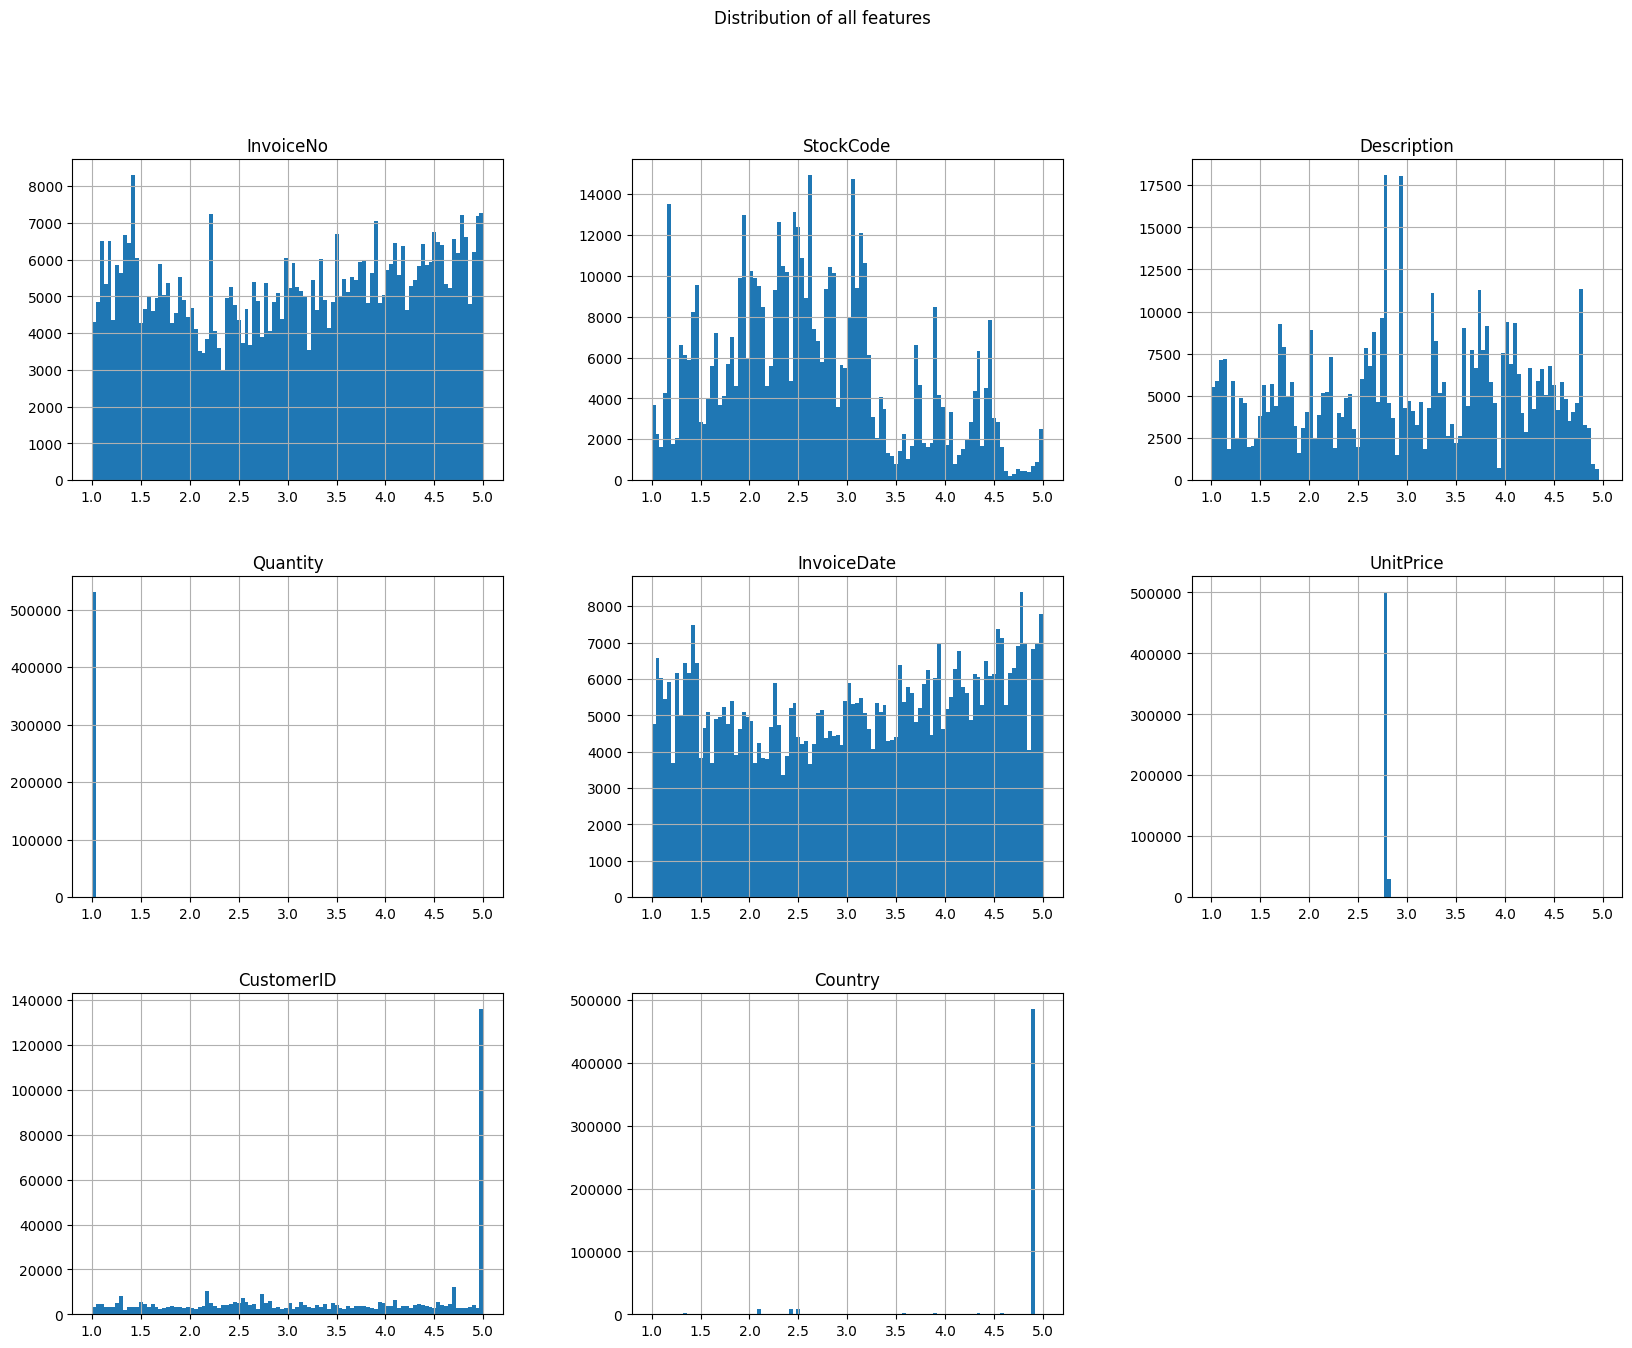

In [80]:
normalized_df.hist(bins = 100, figsize=(20,15))
plt.suptitle('Distribution of all features')
plt.show()

### 2.Pair Plot

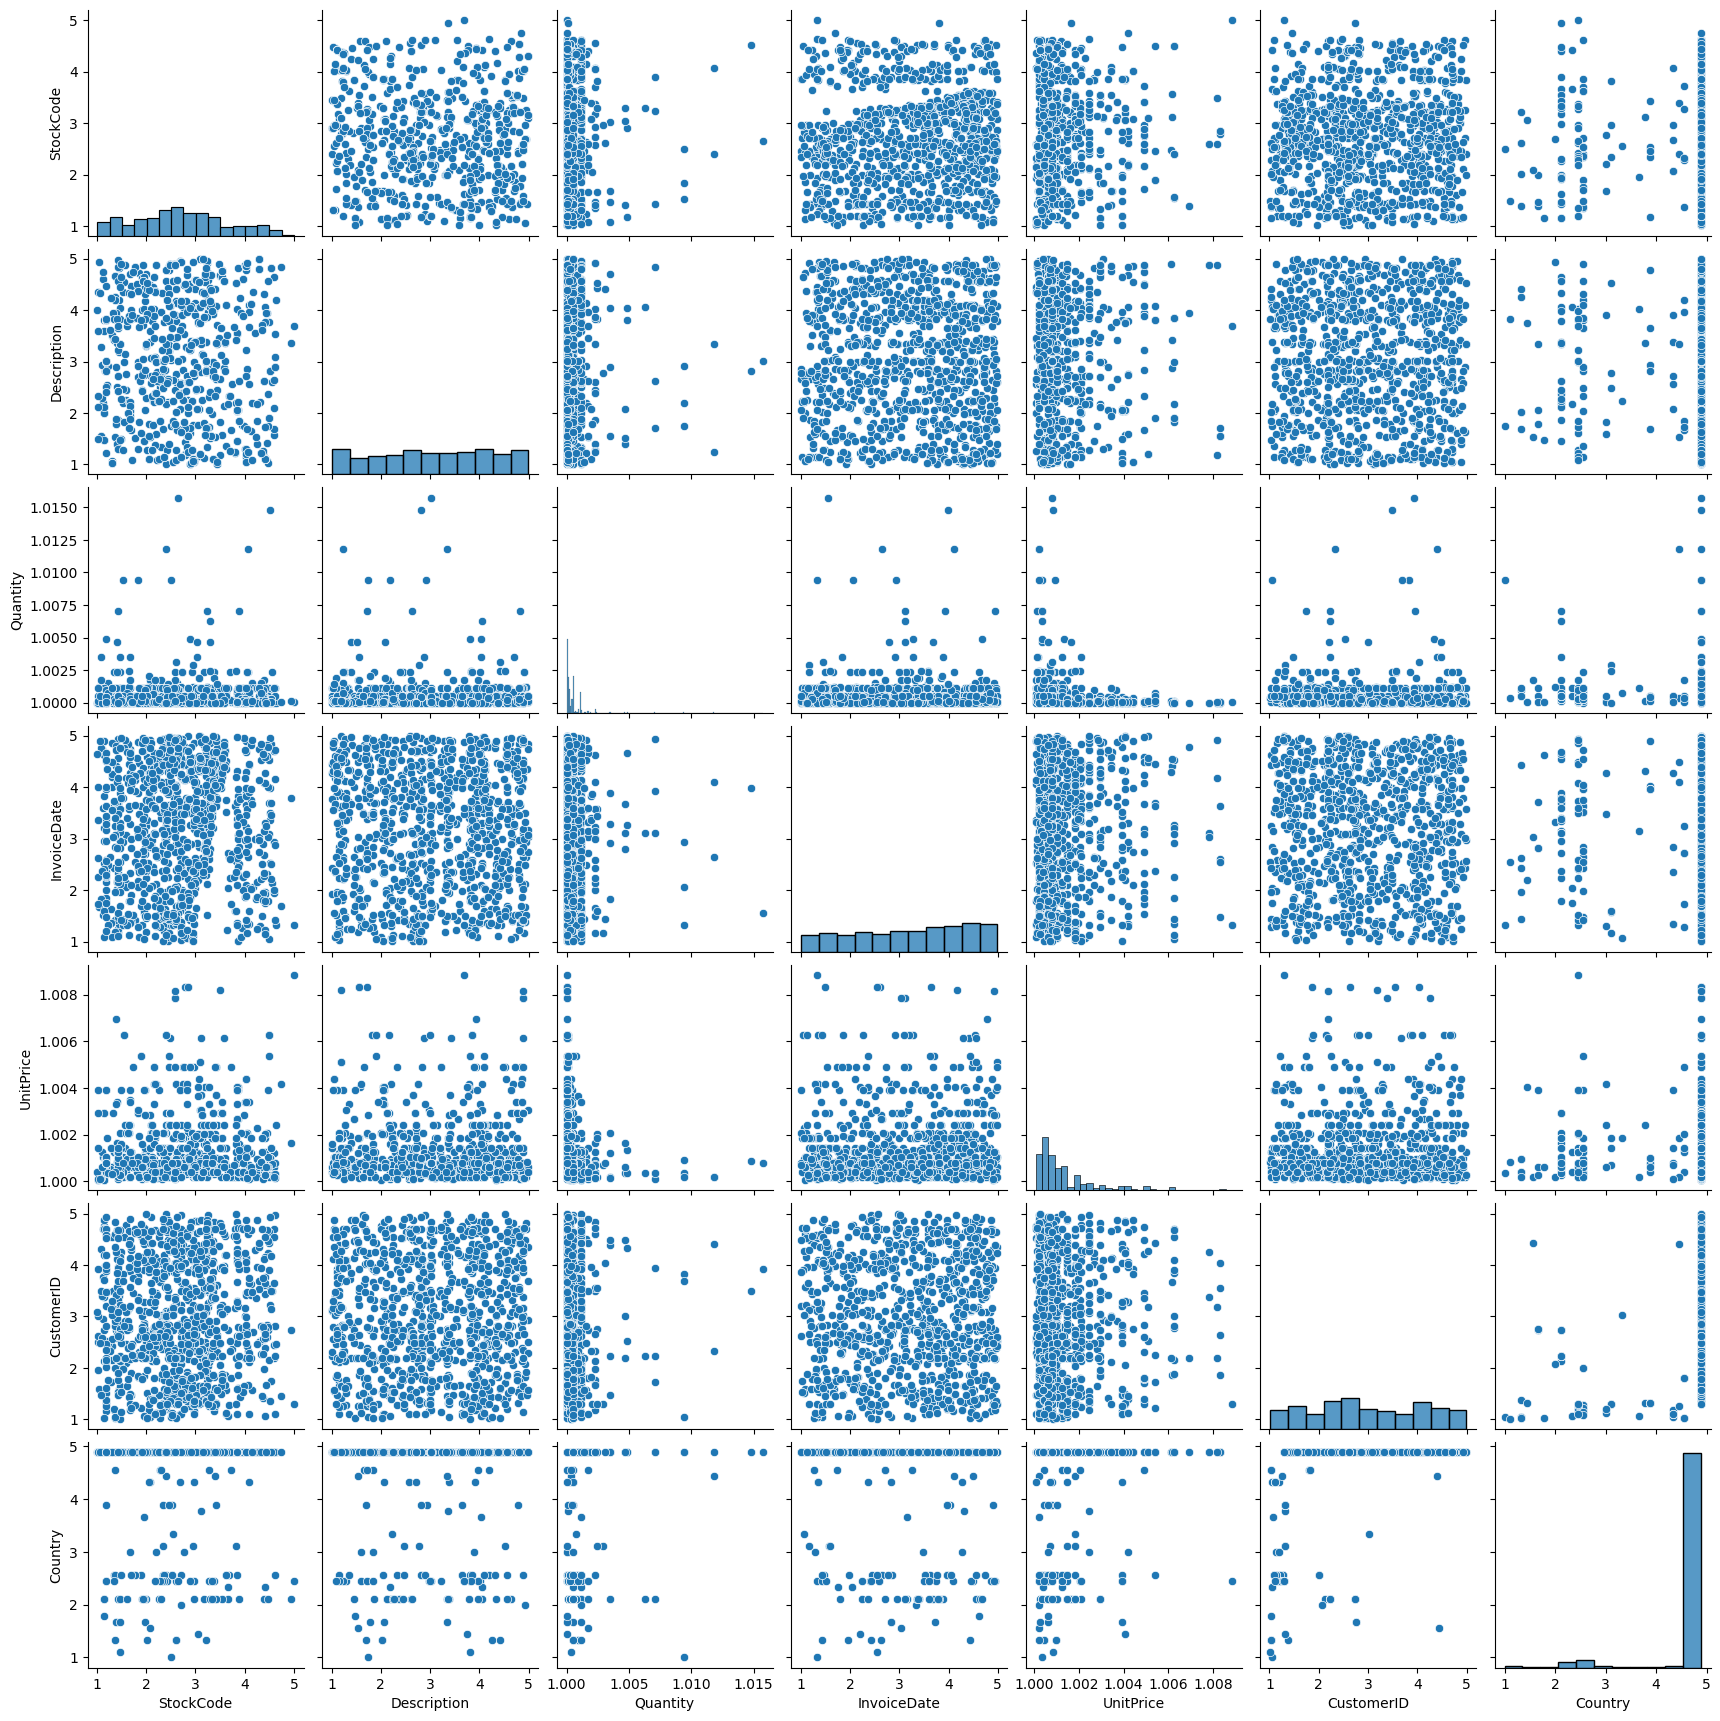

In [43]:
sns.pairplot(normalized_df.sample(1000))
plt.show()

### 3.Heatmap


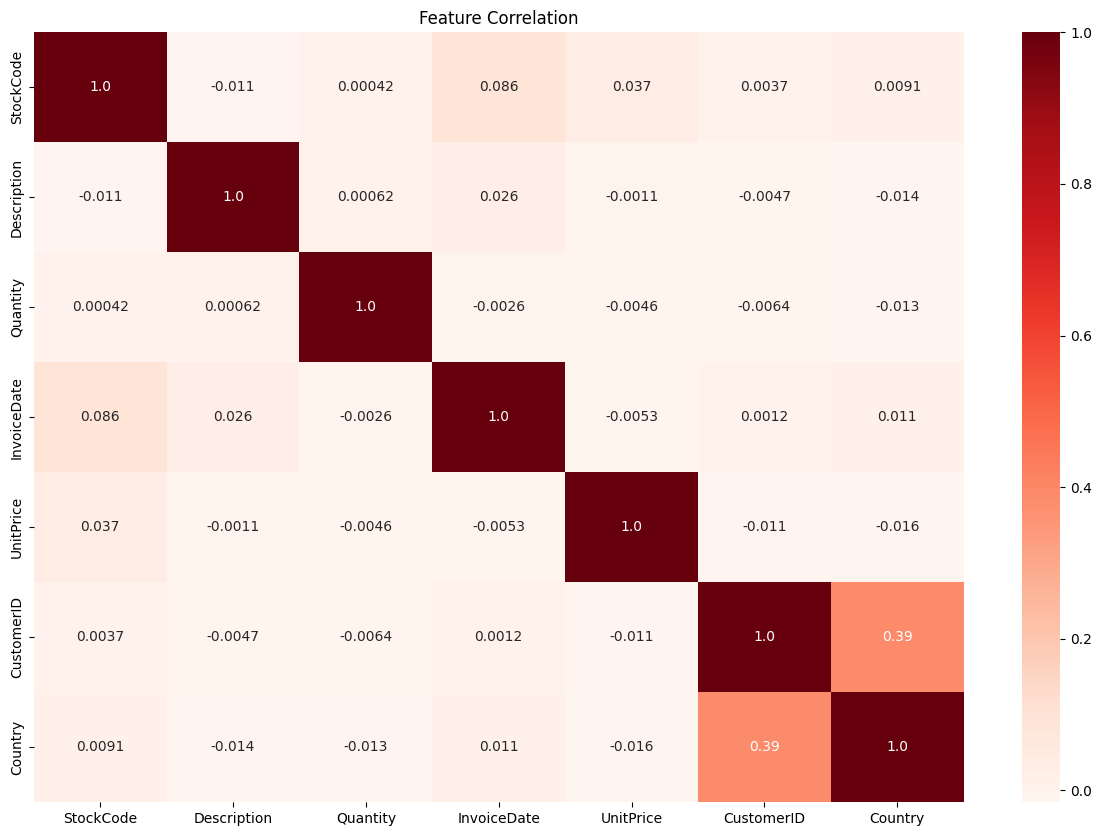

In [44]:
corr = normalized_df.corr()
plt.figure(figsize=(15,10))
sns.heatmap(corr,annot=True,cmap='Reds',fmt='0.2')
plt.title('Feature Correlation')
plt.show()

### 4.PCA

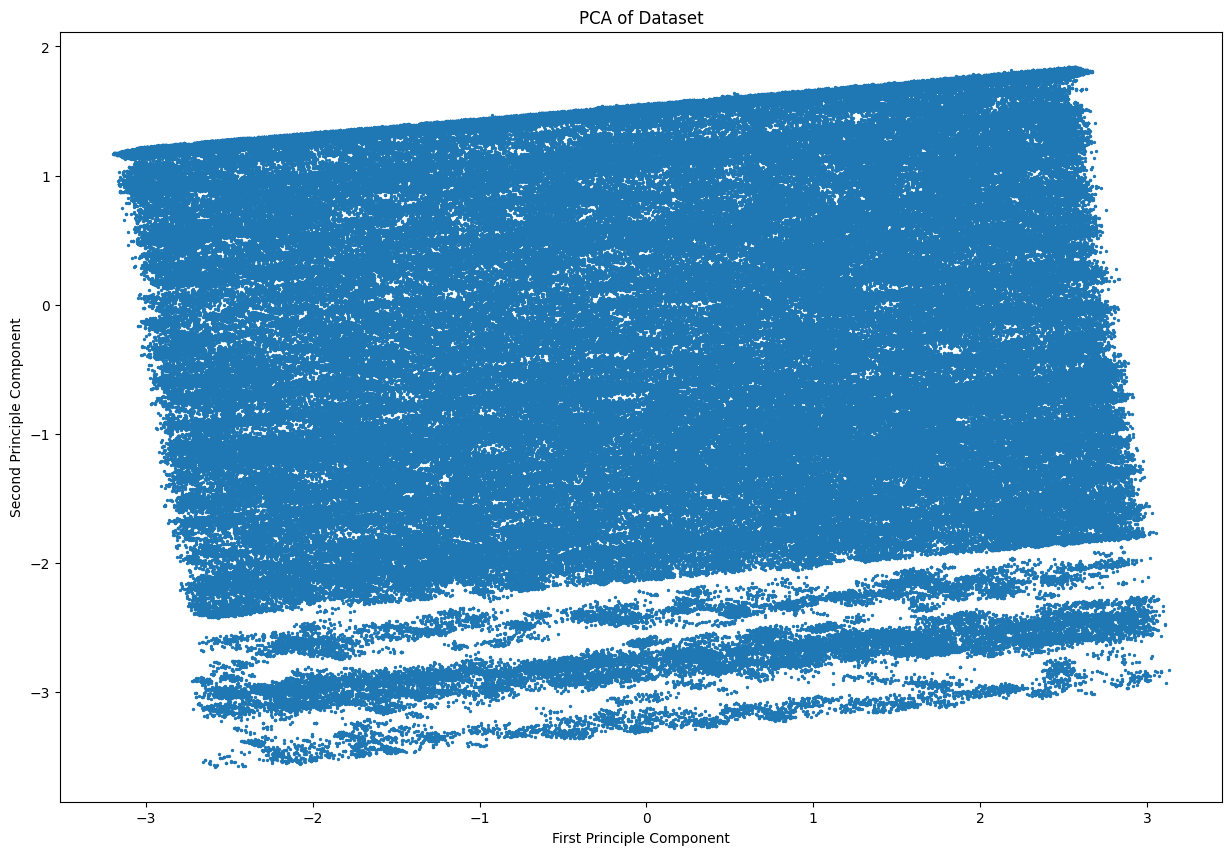

In [81]:
pca = PCA(n_components=2)
pca_results = pca.fit_transform(normalized_df)
plt.figure(figsize=(15,10))
plt.scatter(pca_results[:,0],pca_results[:,1],s=2)
plt.title('PCA of Dataset')
plt.xlabel('First Principle Component')
plt.ylabel('Second Principle Component')
plt.show()

### 5.KDE Plot

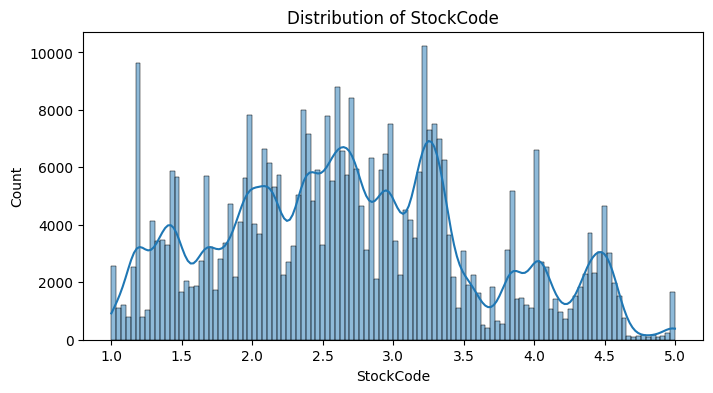

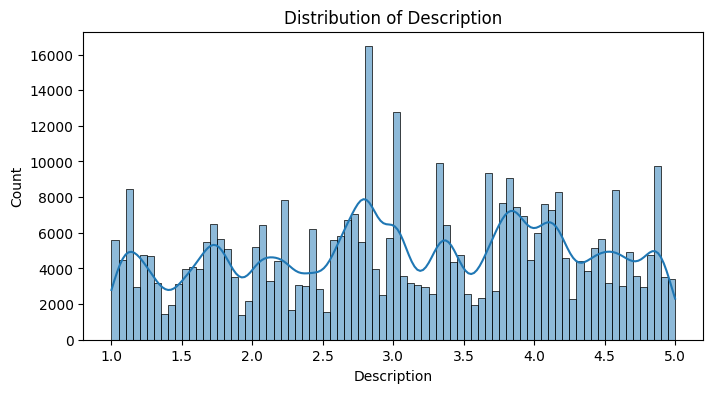

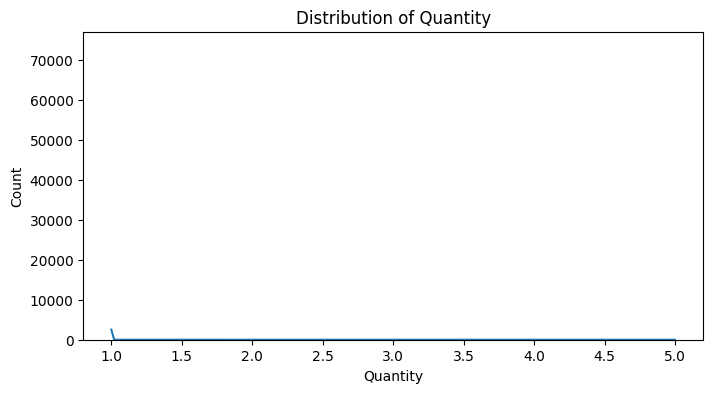

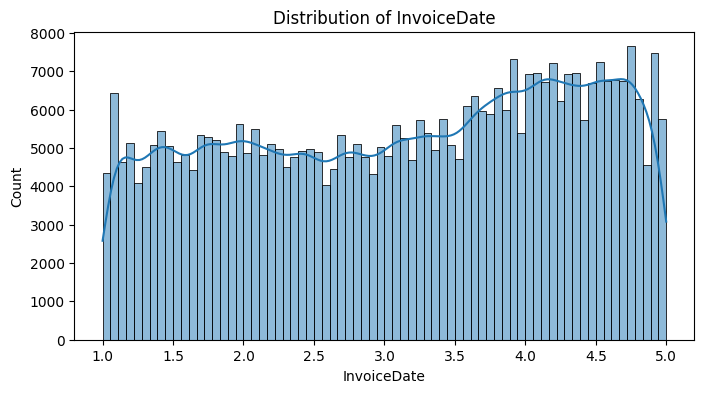

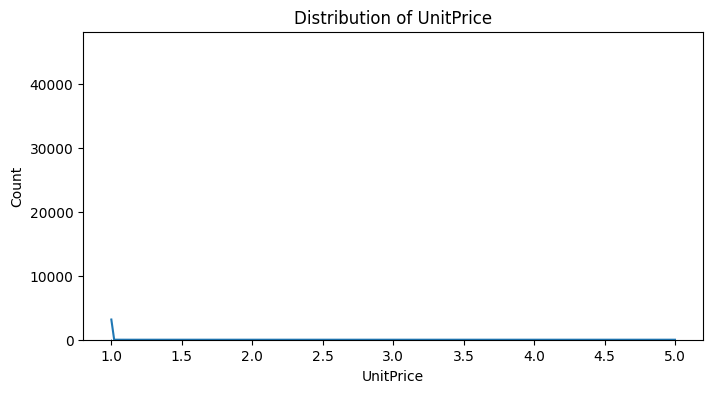

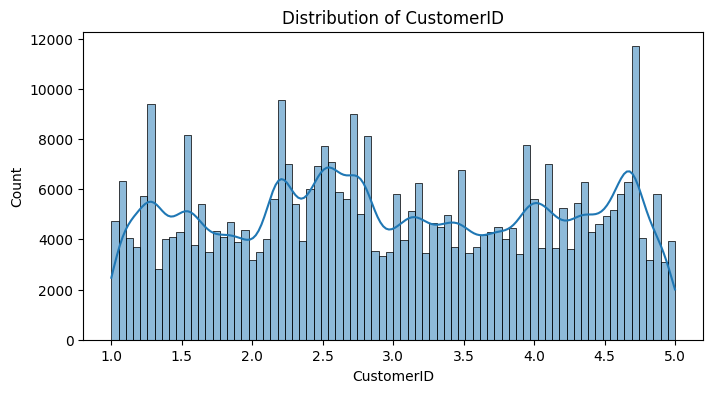

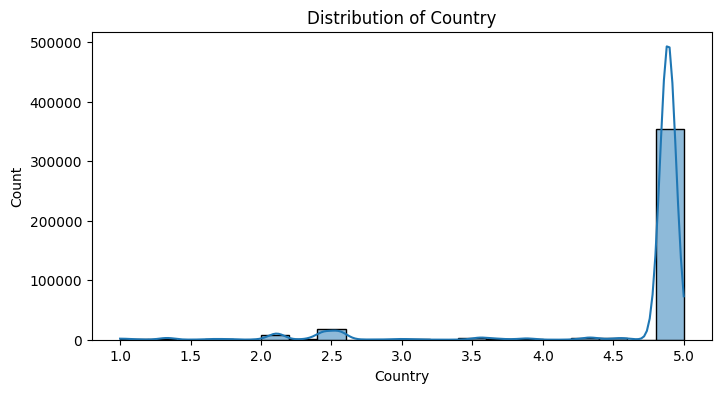

In [46]:
for col in normalized_df.columns:
    plt.figure(figsize=(8,4))
    sns.histplot(normalized_df[col],kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()

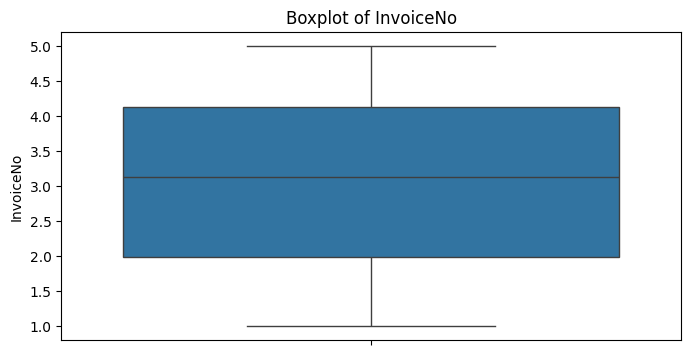

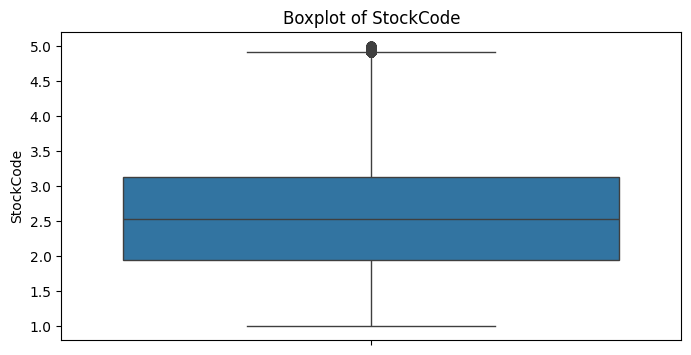

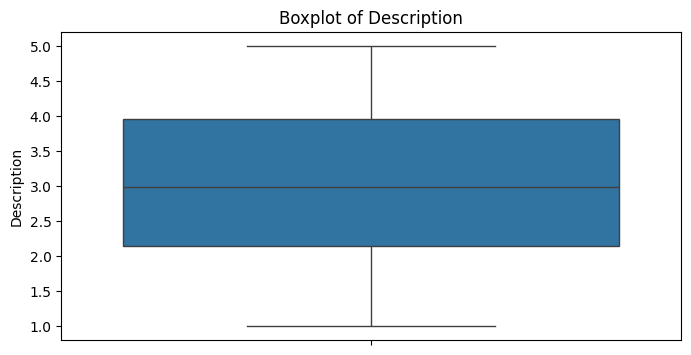

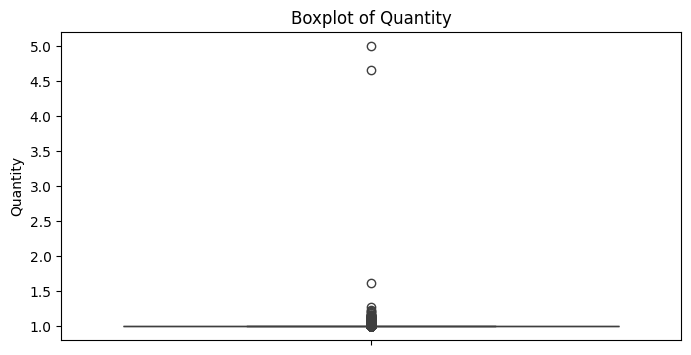

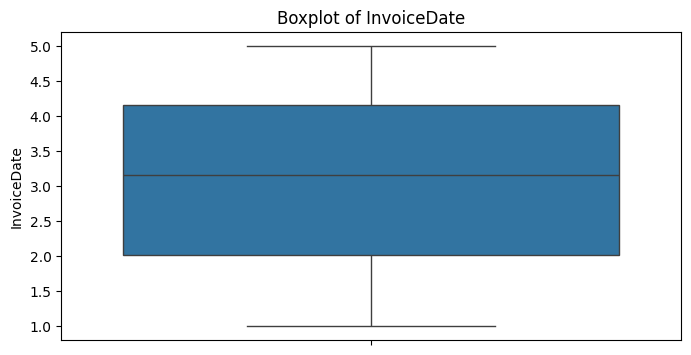

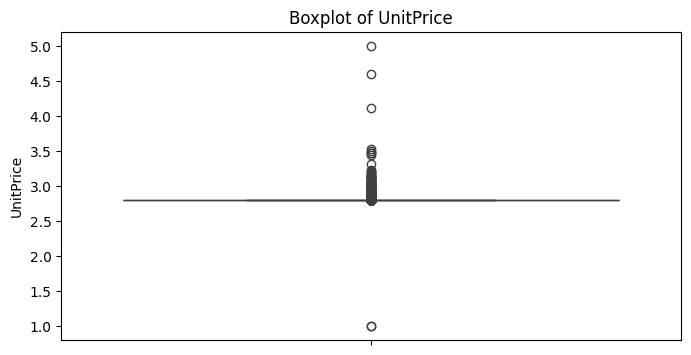

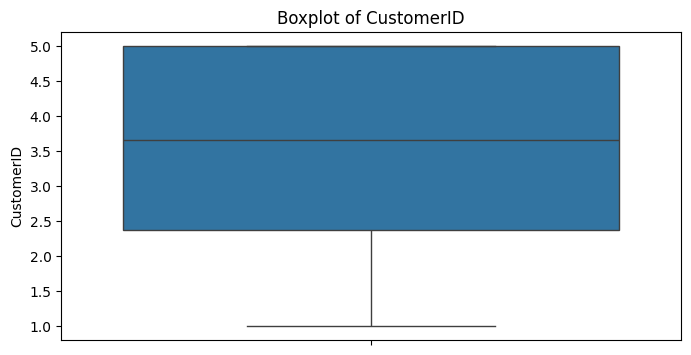

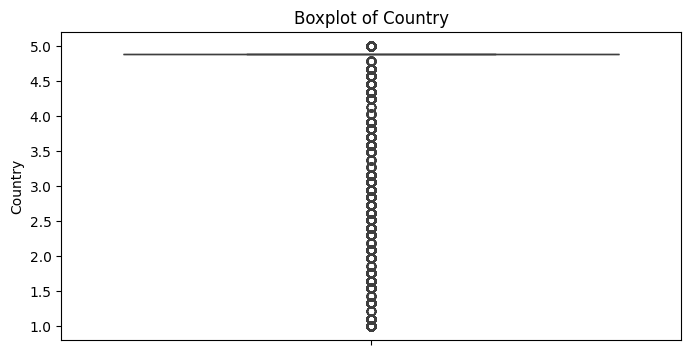

In [82]:
for col in normalized_df:
    plt.figure(figsize=(8,4))
    sns.boxplot(normalized_df[col])
    plt.title(f"Boxplot of {col}")
    plt.show()
    

# 7.Clustering and Evaluation

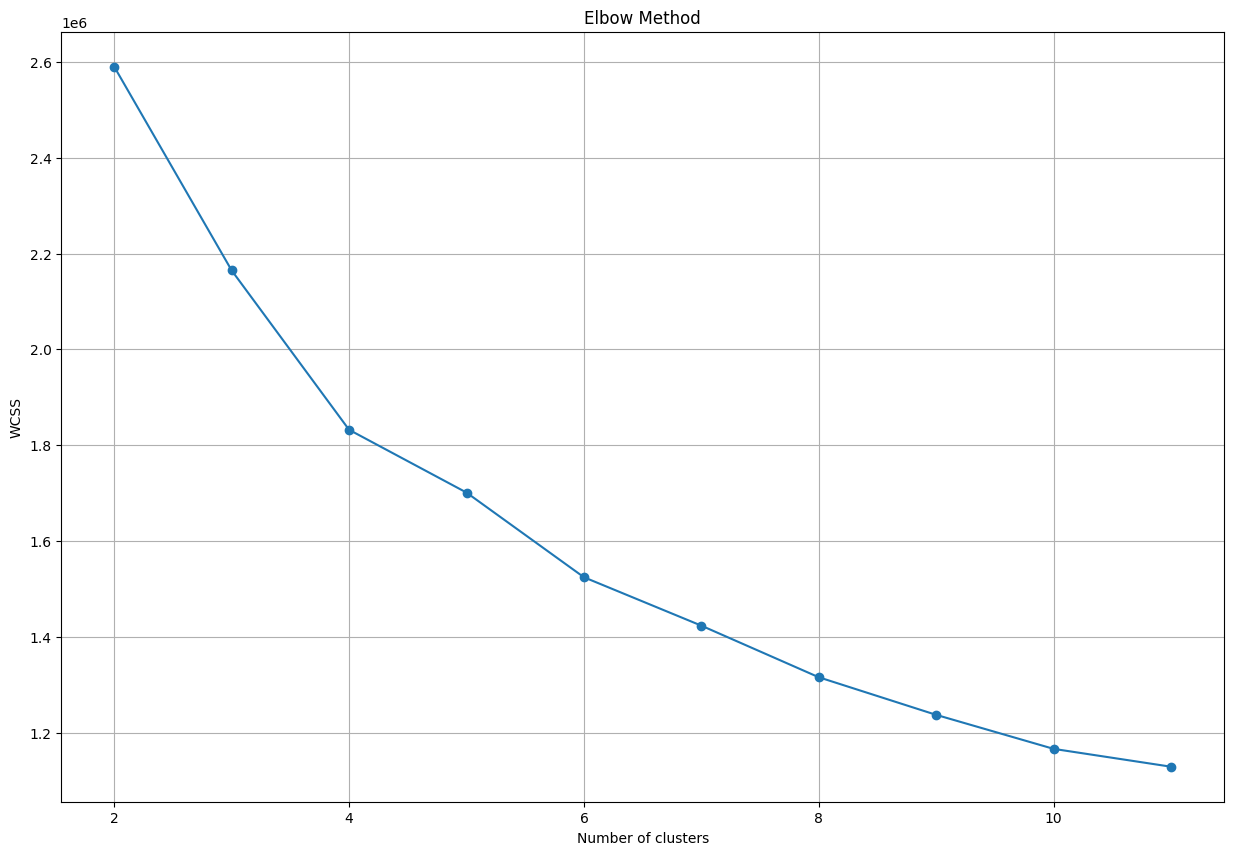

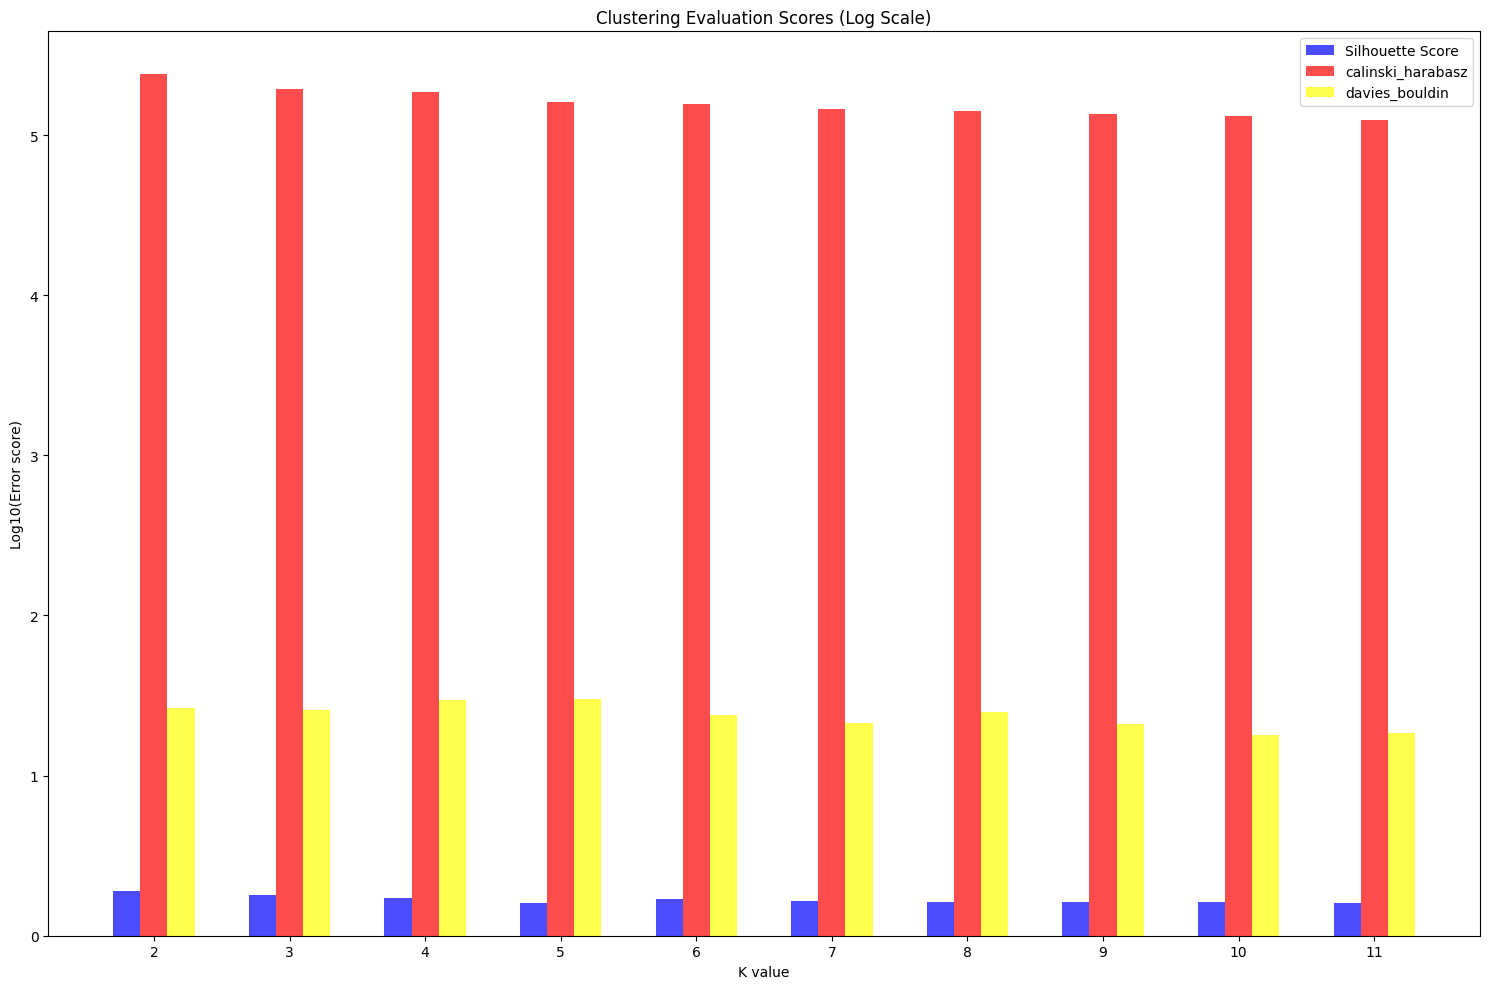

,k_value,silhouette_score,calinkski_harabasz,davies_bouldin
0,2,0.281196,239364.935592,1.419456
1,3,0.253483,195365.582018,1.408445
2,4,0.236015,186027.307249,1.469390
3,5,0.203267,160499.704688,1.477753
4,6,0.228841,155596.128084,1.381482
5,7,0.215679,145153.244289,1.330102
6,8,0.210886,140812.586588,1.397905
7,9,0.213104,135242.010582,1.324257
8,10,0.211848,131120.916086,1.254621
9,11,0.206868,123655.496576,1.263460


In [83]:
wcss = []
si_score,ca_score,da_score = [],[],[]
k_value = [i for i in range(2,12)]

for k in range(2,12):
    km = KMeans(n_clusters=k,random_state=42)
    km.fit(normalized_df)
    labels = km.predict(normalized_df)

    # evaluation metrics 
    si_score.append(silhouette_score(normalized_df,labels,sample_size=30000))
    ca_score.append(calinski_harabasz_score(normalized_df,labels))
    da_score.append(davies_bouldin_score(normalized_df,labels))

    wcss.append(km.inertia_)

# Plotting Process
plt.figure(figsize=(15,10))
plt.plot(range(2,12),wcss,marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.title('Elbow Method')
plt.grid()
plt.show()

plt.figure(figsize=(15,10))
bar_width=0.2
index=np.arange(len(k_value))
plt.bar(index,si_score,bar_width,label='Silhouette Score',color='blue',alpha=0.7)
plt.bar(index + bar_width ,np.log10(ca_score),bar_width,label = 'calinski_harabasz',color = 'red',alpha = 0.7)
plt.bar(index + 2*bar_width ,da_score,bar_width,label = 'davies_bouldin',color = 'yellow',alpha = 0.7)

plt.xlabel('K value')
plt.ylabel('Log10(Error score)')
plt.title('Clustering Evaluation Scores (Log Scale)')
plt.xticks(index+bar_width,k_value)
plt.legend()
plt.tight_layout()
plt.show()

error_dic = {
    'k_value':k_value,
    'silhouette_score':si_score,
    'calinkski_harabasz':ca_score,
    'davies_bouldin':da_score
}
error_df = pd.DataFrame(error_dic)
error_df

In [84]:
km = KMeans(n_clusters=5,random_state=42)
km.fit(normalized_df)
labels = km.predict(normalized_df)


C:\Users\HP\AppData\Local\Temp\ipykernel_644\1575615003.py:17: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


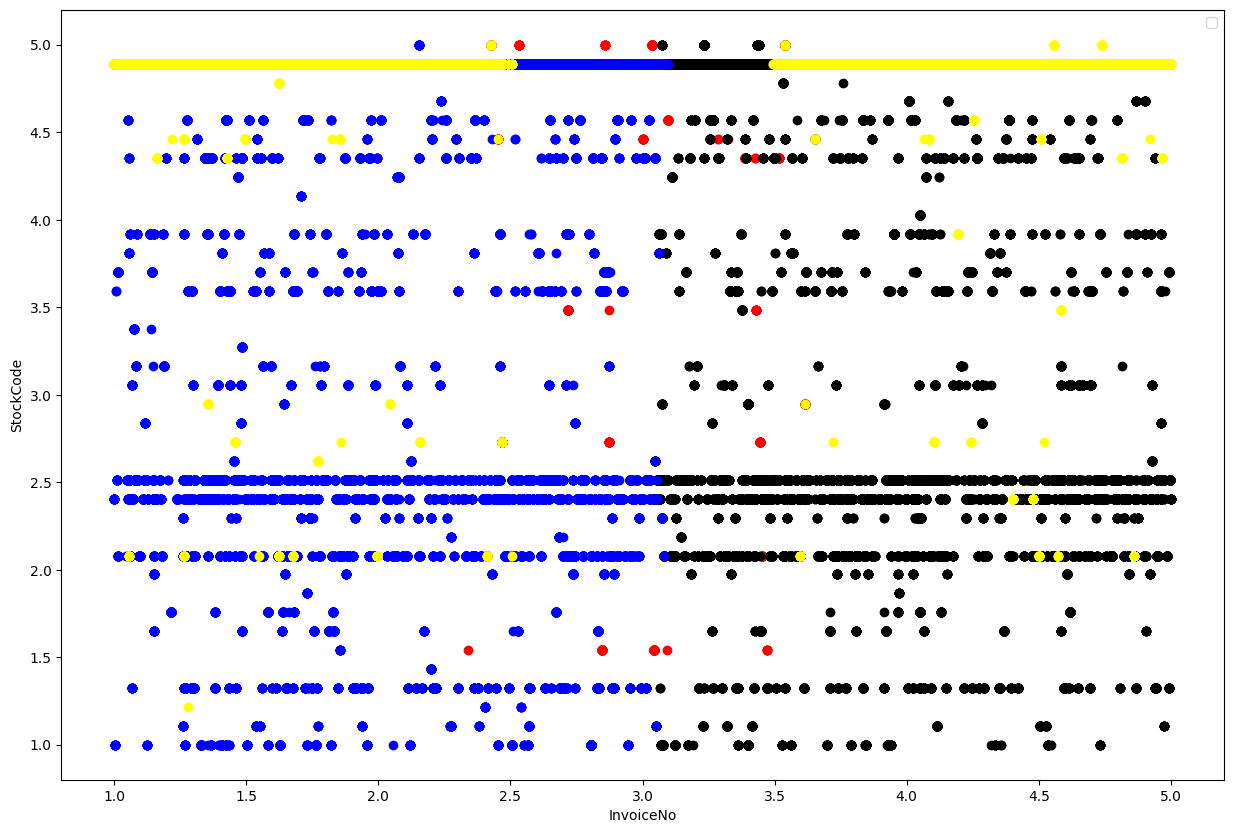

In [86]:
normalized_df['K-mean-cluster'] = labels
df_1 = normalized_df[normalized_df['K-mean-cluster'] == 0]
df_2 = normalized_df[normalized_df['K-mean-cluster'] == 1]
df_3 = normalized_df[normalized_df['K-mean-cluster'] == 2]
df_4 = normalized_df[normalized_df['K-mean-cluster'] == 3]
df_5 = normalized_df[normalized_df['K-mean-cluster'] == 4]

plt.figure(figsize=(15,10))
plt.scatter(df_1.InvoiceNo,df_1.Country,color = 'red')
plt.scatter(df_2.InvoiceNo,df_2.Country,color = 'black')
plt.scatter(df_3.InvoiceNo,df_3.Country,color = 'blue')
plt.scatter(df_4.InvoiceNo,df_4.Country,color = 'yellow')
plt.scatter(df_5.InvoiceNo,df_5.Country,color = 'yellow')

plt.xlabel('InvoiceNo')
plt.ylabel('StockCode')
plt.legend()
plt.show()

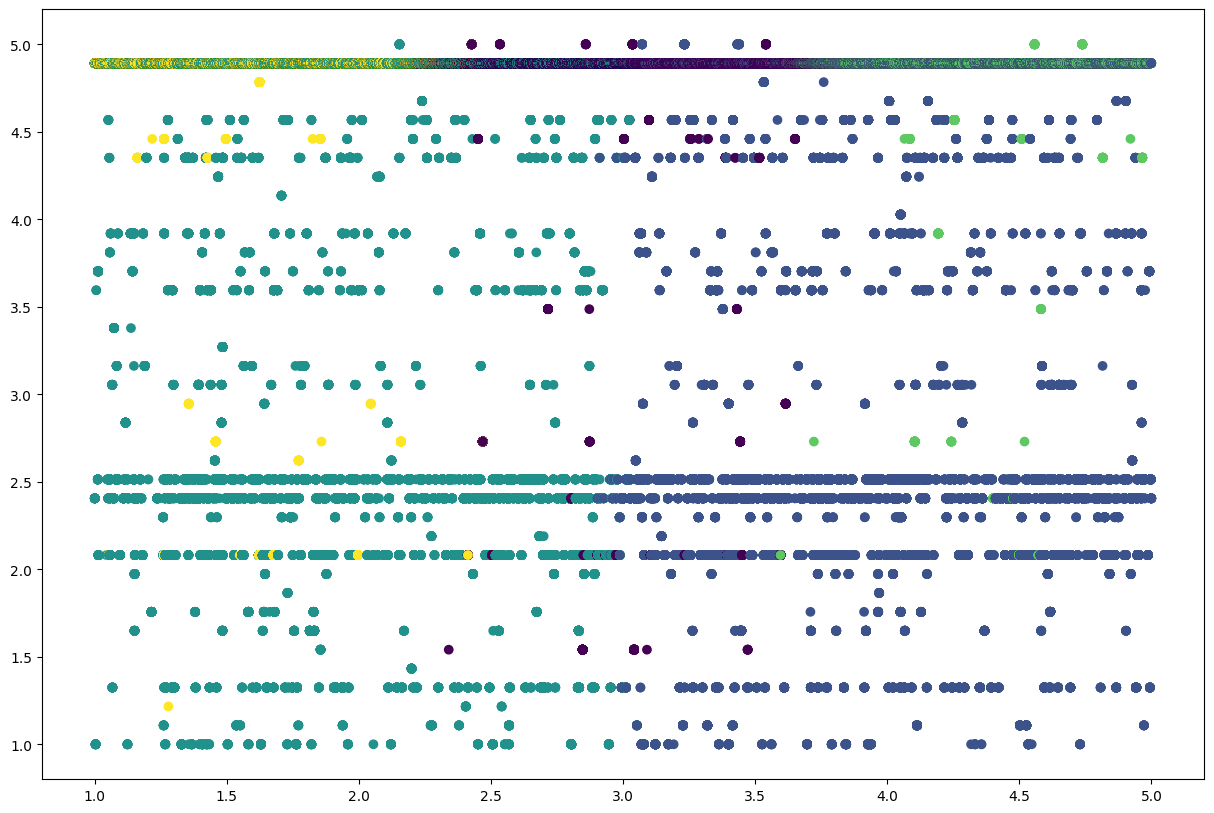

In [87]:
plt.figure(figsize=(15,10))
plt.scatter(normalized_df.InvoiceNo,normalized_df.Country,c = normalized_df['K-mean-cluster'])
plt.show()

In [89]:
for i in range(2,6) :

    pca = PCA(n_components=i,random_state=0)
    pca_result = pca.fit_transform(normalized_df)
    explained_variance = pca.explained_variance_ratio_
    print(f'{i} component cover {np.sum(explained_variance):.2f}')

2 component cover 0.60
3 component cover 0.74
4 component cover 0.87
5 component cover 0.96


The explained variance ration : [0.37 0.23 0.14 0.12]


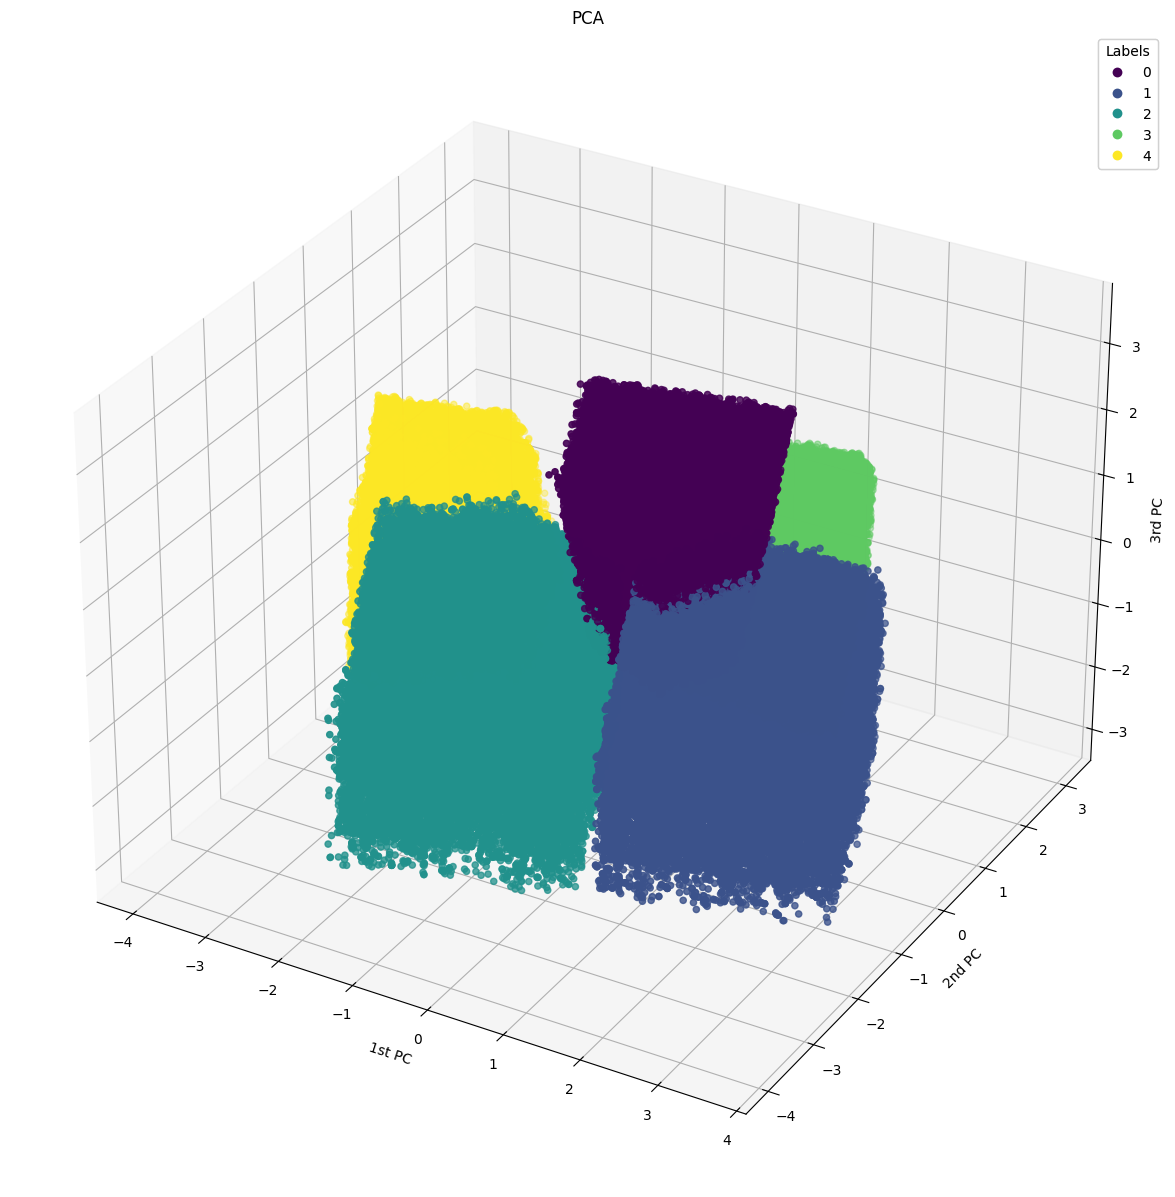

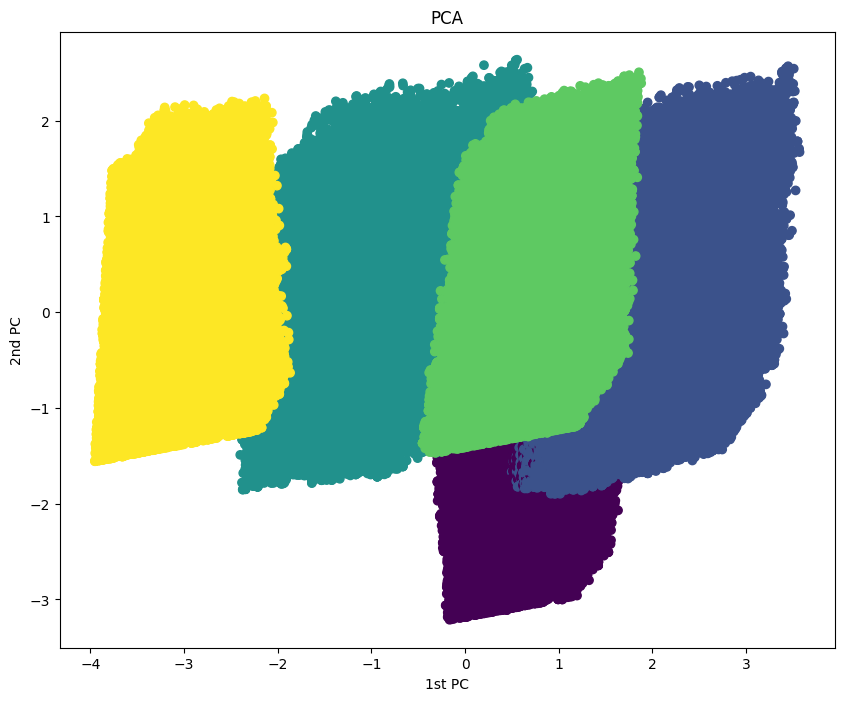

In [93]:
pca = PCA(n_components=4,random_state=42)
pca_result = pca.fit_transform(normalized_df)
print(f"The explained variance ration : {pca.explained_variance_ratio_.round(2)}")

plt.figure(figsize=(25,15))
ax = plt.axes(projection='3d')
scatter = ax.scatter3D(pca_result[:,0],pca_result[:,1],pca_result[:,2],c=labels)
plt.xlabel('1st PC')
plt.ylabel('2nd PC')
ax.set_zlabel('3rd PC')
plt.title('PCA')
legend1 = ax.legend(*scatter.legend_elements(),title='Labels')
ax.add_artist(legend1)
plt.show()

plt.figure(figsize=(10,8))
plt.scatter(pca_result[:,0],pca_result[:,3],c=labels)
plt.xlabel('1st PC')
plt.ylabel('2nd PC')
plt.title('PCA')
plt.show()
